# G2. MAE VS NUMBER OF TREES 

## 1. Importing Libraries and Datasets

In [1]:
# Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [2]:
# Train Dataset

train_data = pd.read_csv("BG_Train_Dataset.csv") 
train_df = train_data.copy()
train_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,3.346,4.337,1.549,5.791,7.307,1,1,1,2,129


In [3]:
# Test Dataset

test_data = pd.read_csv("BG_Test_Dataset.csv") 
test_df = test_data.copy()
test_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,4.165,5.322,0.0,8.05,6.734,0,0,1,3,130


In [4]:
# Defining X_train and Y_train

Y_train = train_df['Post Operative Glucose']
X_train = train_df.drop('Post Operative Glucose', axis = 1)
X_train.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,3.346,4.337,1.549,5.791,7.307,1,1,1,2


In [5]:
# Defining X_test and Y_test

Y_test = test_df['Post Operative Glucose']
X_test = test_df.drop('Post Operative Glucose', axis = 1)
X_test.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,4.165,5.322,0.0,8.05,6.734,0,0,1,3


In [6]:
# Using the KFold function for cross-validation

cv = KFold(n_splits = 5, shuffle = True, random_state = 126)

In [7]:
# Function that calculates the cross validated test MAE   

def cv_scores(X,Y, model,cv):
        
    cv_MAE = round(np.mean(cross_val_score(model, X, Y, cv=cv, 
                                       scoring='neg_mean_absolute_error', 
                                           error_score='raise') * (-1)),2)
    
    score = cv_MAE
    return score

## 2. MAE vs Number of trees

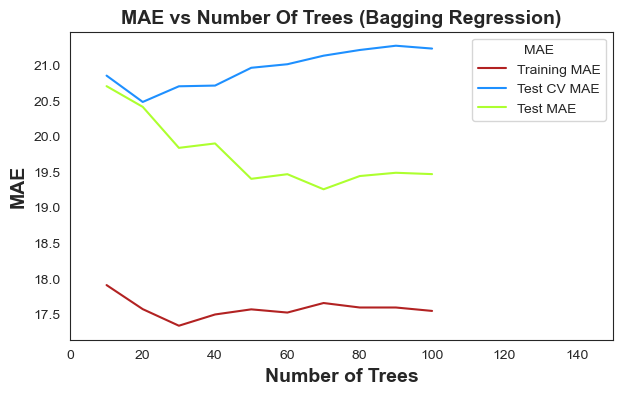

In [8]:
# BAGGING
num_of_ests = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Training_MAE = []
Test_CV_MAE = []
Test_MAE = []

best_estimator_DTR = DecisionTreeRegressor(max_depth = 8 ,
                                        max_leaf_nodes = 10,
                                        min_samples_leaf = 4,
                                       min_samples_split = 4)

for i in num_of_ests:
    
    
    Best_BR_DTR = BaggingRegressor(base_estimator = best_estimator_DTR, 
                              bootstrap = False,
                             bootstrap_features=False,
                             max_features = 0.45,
                             max_samples = 0.4,
                             n_estimators = i, random_state = 126).fit(X_train, Y_train)
    
    Tr_MAE = np.round(mean_absolute_error(Y_train, Best_BR_DTR.predict(X_train)),3)

    Tst_CV_MAE = cv_scores(X_train,Y_train, Best_BR_DTR,cv)

    Tst_MAE = np.round(mean_absolute_error(Y_test, Best_BR_DTR.predict(X_test)),3)
    
    Training_MAE.append(Tr_MAE)
    Test_CV_MAE.append(Tst_CV_MAE)
    Test_MAE.append(Tst_MAE)

sns.set_style("white")
    
plt.figure(figsize=(7,4))
plt.plot(num_of_ests, Training_MAE, label = 'Training MAE', color = 'firebrick')
plt.plot(num_of_ests, Test_CV_MAE, label = 'Test CV MAE', color = 'dodgerblue')
plt.plot(num_of_ests, Test_MAE, label = 'Test MAE', color = 'greenyellow')

plt.title('MAE vs Number Of Trees (Bagging Regression)', fontsize = 14, weight = 'bold')
plt.xlabel('Number of Trees', fontsize = 14, weight = 'bold')
plt.ylabel("MAE", fontsize = 14, weight = 'bold')

plt.legend(title='MAE', loc = 'upper right' )

plt.xlim(0, 150)

plt.show()

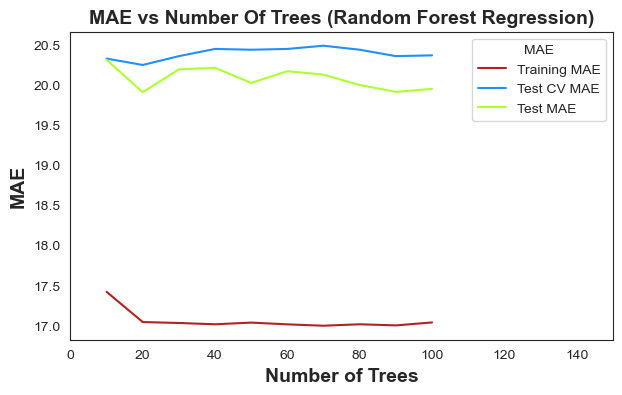

In [9]:
# RANDOM FOREST

num_of_ests = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Training_MAE = []
Test_CV_MAE = []
Test_MAE = []



for i in num_of_ests:
    
    
    Best_RFR = RandomForestRegressor(random_state = 126,
                                 max_depth = 4,
                                 n_estimators = i, 
                                 min_samples_split = 2, 
                                 min_samples_leaf = 6,
                                 bootstrap = False,
                                 max_leaf_nodes = 8,
                                          max_features = 'sqrt').fit(X_train,Y_train)
    
    Tr_MAE = np.round(mean_absolute_error(Y_train, Best_RFR.predict(X_train)),3)

    Tst_CV_MAE = cv_scores(X_train,Y_train, Best_RFR,cv)

    Tst_MAE = np.round(mean_absolute_error(Y_test, Best_RFR.predict(X_test)),3)
    
    Training_MAE.append(Tr_MAE)
    Test_CV_MAE.append(Tst_CV_MAE)
    Test_MAE.append(Tst_MAE)

sns.set_style("white")
    
plt.figure(figsize=(7,4))
plt.plot(num_of_ests, Training_MAE, label = 'Training MAE', color = 'firebrick')
plt.plot(num_of_ests, Test_CV_MAE, label = 'Test CV MAE', color = 'dodgerblue')
plt.plot(num_of_ests, Test_MAE, label = 'Test MAE', color = 'greenyellow')

plt.title('MAE vs Number Of Trees (Random Forest Regression)', fontsize = 14, weight = 'bold')
plt.xlabel('Number of Trees', fontsize = 14, weight = 'bold')
plt.ylabel("MAE", fontsize = 14, weight = 'bold')

plt.legend(title='MAE', loc = 'upper right' )

plt.xlim(0, 150)

plt.show()

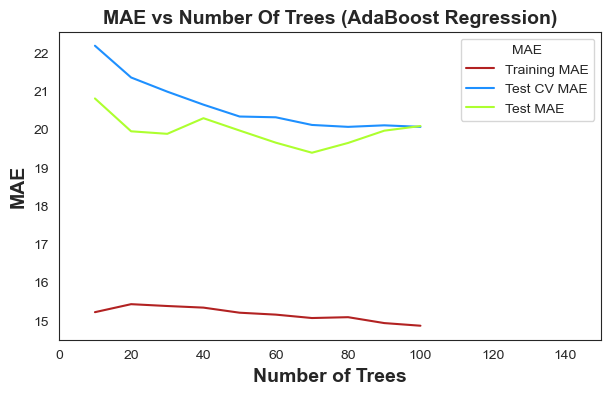

In [10]:
# AdaBoost

num_of_ests = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Training_MAE = []
Test_CV_MAE = []
Test_MAE = []

best_estimator_DTR = DecisionTreeRegressor(max_depth = 8 ,
                                        max_leaf_nodes = 10,
                                        min_samples_leaf = 8,
                                       min_samples_split = 4)

for i in num_of_ests:
    
    
    Best_ABR_DTR = AdaBoostRegressor(base_estimator = best_estimator_DTR,
                                   n_estimators= i,
                                   learning_rate = 1,
                                   loss = 'square',
                                   random_state = 126).fit(X_train, Y_train)
    
    Tr_MAE = np.round(mean_absolute_error(Y_train, Best_ABR_DTR.predict(X_train)),3)

    Tst_CV_MAE = cv_scores(X_train,Y_train, Best_ABR_DTR,cv)

    Tst_MAE = np.round(mean_absolute_error(Y_test, Best_ABR_DTR.predict(X_test)),3)
    
    Training_MAE.append(Tr_MAE)
    Test_CV_MAE.append(Tst_CV_MAE)
    Test_MAE.append(Tst_MAE)

sns.set_style("white")
    
plt.figure(figsize=(7,4))
plt.plot(num_of_ests, Training_MAE, label = 'Training MAE', color = 'firebrick')
plt.plot(num_of_ests, Test_CV_MAE, label = 'Test CV MAE', color = 'dodgerblue')
plt.plot(num_of_ests, Test_MAE, label = 'Test MAE', color = 'greenyellow')

plt.title('MAE vs Number Of Trees (AdaBoost Regression)', fontsize = 14, weight = 'bold')
plt.xlabel('Number of Trees', fontsize = 14, weight = 'bold')
plt.ylabel("MAE", fontsize = 14, weight = 'bold')

plt.legend(title='MAE', loc = 'upper right' )

plt.xlim(0, 150)

plt.show()